In [2]:
import ROOT as rt
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
from numpy import linalg as LA
from ROOT import TLorentzVector
from array import array
# import PyTEX

import math

# sys.path.append('/nfshome/christiw/llp/delayed_jet_analyzer/lib/')
sys.path.append('/nfshome/jmao/cms-llp/delayed_jet_analyzer/lib/')

from histo_utilities import create_TH1D, create_TH2D, create_TGraph,std_color_list
     
import CMS_lumi, tdrstyle 
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

# donotdelete = []
print(sys.version)

3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


In [3]:
dirs = {}

# dirs['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_V1_aod.root'] = '/mnt/hadoop/store/group/phys_exotica/jmao/aodsim/RunIISummer16/delphes_output/'
# dirs['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V1_aod.root'] = '/mnt/hadoop/store/group/phys_exotica/jmao/aodsim/RunIISummer16/delphes_output/'
dirs['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root'] = '/mnt/hadoop/store/group/phys_exotica/jmao/aodsim/RunIISummer16/delphes_output/'
 
# dirs['2016-SMS-TChiHH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_200_1pb_weighted.root'] = '/mnt/hadoop/store/group/phys_susy/razor/Run2Analysis/SusyEwkHgg/Signal2016/TChiHH/'
dirs['2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_127_1_1pb_weighted.root'] = '/mnt/hadoop/store/group/phys_susy/razor/Run2Analysis/SusyEwkHgg/Signal2016/TChiWH/'

 
out_dir = '/nfshome/jmao/cms-llp/plots/20190919/'

fname = {
#     'ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_V1_aod.root',
#     'ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V1_aod.root',
    'ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root',

#     '2016-SMS-TChiHH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_200_1pb_weighted.root',
    '2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_127_1_1pb_weighted.root',
        }

texs = {}

# texs['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_V1_aod.root'] = 'prompt, H(bb)Z'
# texs['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V1_aod.root'] = 'ctau = 2 values, W(lv)H(bb)'
texs['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root'] = 'ctau = 10000 mm, W(lv)H(bb)'


# texs['2016-SMS-TChiHH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_200_1pb_weighted.root'] = 'cms, H(gg)H(gg)'
texs['2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_127_1_1pb_weighted.root'] = 'cms, W(lv)H(gg)'

cols = {}

 
# cols['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_V1_aod.root'] = 2
# cols['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V1_aod.root'] = 3
cols['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root'] = 215


# cols['2016-SMS-TChiHH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_200_1pb_weighted.root'] = 207
cols['2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_127_1_1pb_weighted.root'] = 51

tree = OrderedDict()

f_dir = ''
for file in fname:
    print(dirs[file]+file)
 
    root_dir = uproot.open(dirs[file]+file) 
    if 'aod' in file:
        tree[file] = root_dir['ntuples/llp']
    else:
        tree[file] = root_dir['HggRazorLeptons']
 
    print ('Open ready')
    print(texs[file])
    print ('Tree ready') 
    print(tree[file], tree)

/mnt/hadoop/store/group/phys_susy/razor/Run2Analysis/SusyEwkHgg/Signal2016/TChiWH/2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_127_1_1pb_weighted.root
Open ready
cms, W(lv)H(gg)
Tree ready
<TTree b'HggRazorLeptons' at 0x7f17c8799518> OrderedDict([('2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_127_1_1pb_weighted.root', <TTree b'HggRazorLeptons' at 0x7f17c8799518>)])
/mnt/hadoop/store/group/phys_exotica/jmao/aodsim/RunIISummer16/delphes_output/ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root
Open ready
ctau = 10000 mm, W(lv)H(bb)
Tree ready
<TTree b'llp' at 0x7f17c87b71d0> OrderedDict([('2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_127_1_1pb_weighted.root', <TTree b'HggRazorLeptons' at 0x7f17c8799518>), ('ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root', <TTree b'llp' at 0x7f17c87b71d0>)])


# b jet Pt

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root <TTree b'llp' at 0x7f2264df3f60>
2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_200_1_1pb_weighted.root <TTree b'HggRazorLeptons' at 0x7f225b0be5c0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190919/b_pt.png has been created


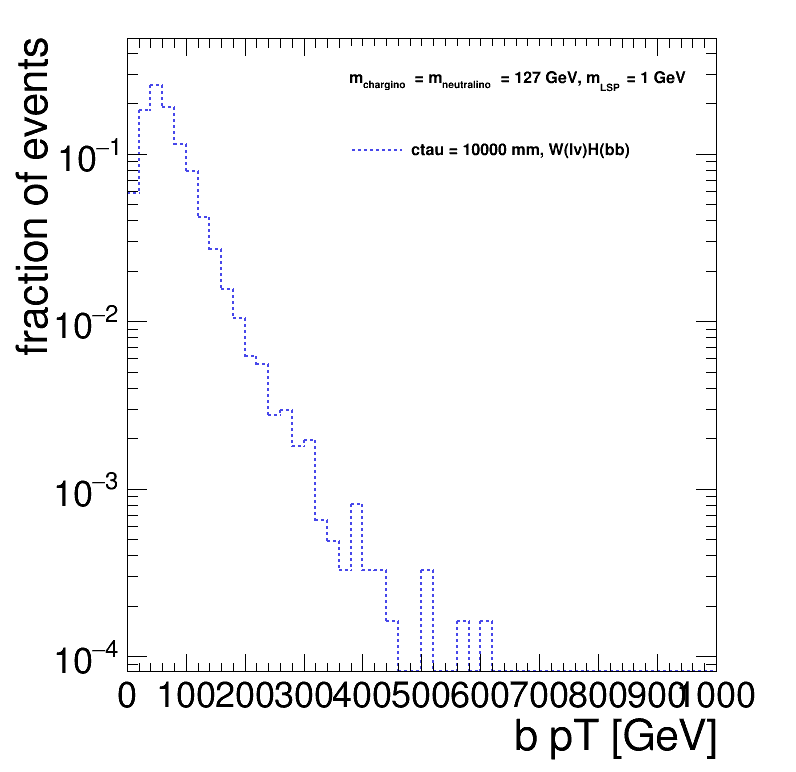

In [29]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    if 'aod' in k:
    
        pid = v['gParticleId'].array()
        status = v['gParticleStatus'].array()
        pt = v['gParticlePt'].array()

        basic_str = np.logical_and(pid==5, status==23)

        b_pt = pt[basic_str]

        b_pt_all = b_pt.flatten()

        ht[k] = create_TH1D( b_pt_all, axis_title=['b pT [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
        ht[k].SetLineStyle(i+2)
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])

        ht[k].DrawNormalized('same')

        leg.AddEntry(ht[k], texs[k])
 
        i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'b_pt.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root <TTree b'llp' at 0x7f2264df3f60>
2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_200_1_1pb_weighted.root <TTree b'HggRazorLeptons' at 0x7f225b0be5c0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190919/bbar_pt.png has been created


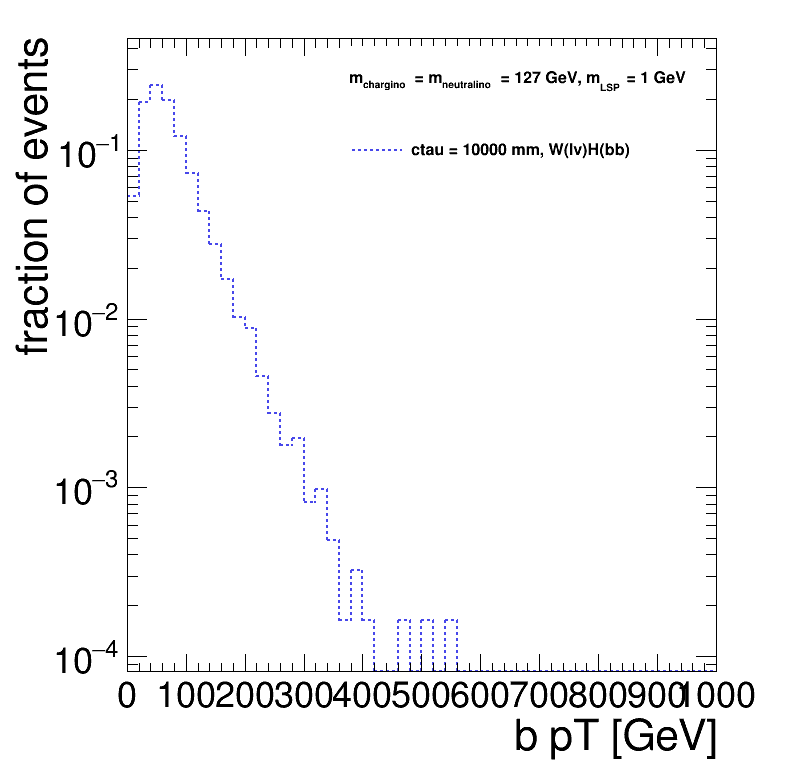

In [30]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    if 'aod' in k:
    
        pid = v['gParticleId'].array()
        status = v['gParticleStatus'].array()
        pt = v['gParticlePt'].array()

        basic_str = np.logical_and(pid==-5, status==23)

        b_pt = pt[basic_str]

        b_pt_all = b_pt.flatten()

        ht[k] = create_TH1D( b_pt_all, axis_title=['b pT [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
        ht[k].SetLineStyle(i+2)
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])

        ht[k].DrawNormalized('same')

        leg.AddEntry(ht[k], texs[k])
 
        i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'bbar_pt.png')

# MET

2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_127_1_1pb_weighted.root <TTree b'HggRazorLeptons' at 0x7f17c8799518>
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root <TTree b'llp' at 0x7f17c87b71d0>
<class 'numpy.ndarray'>


Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190919/met.png has been created


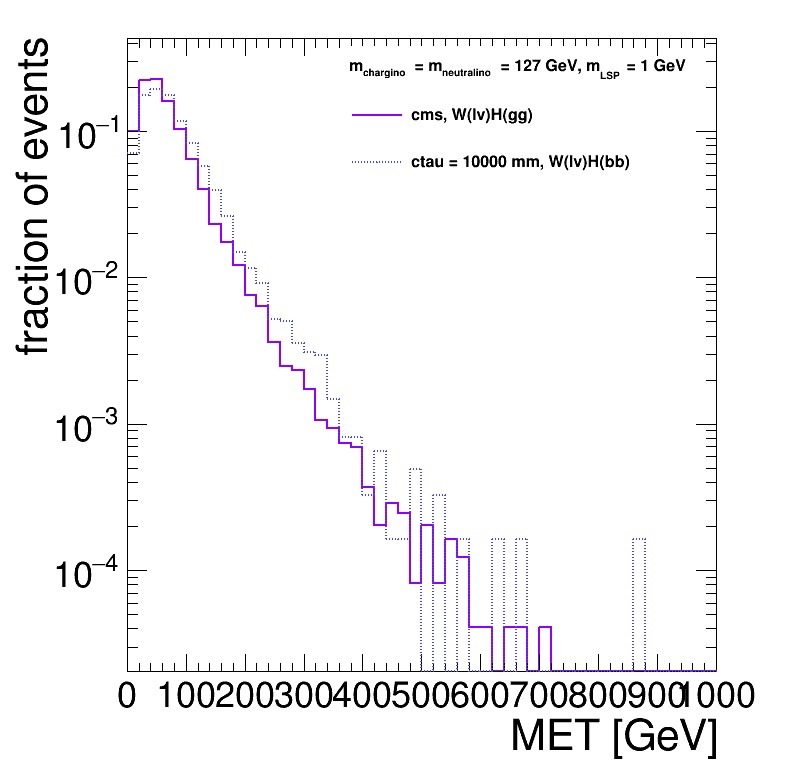

In [4]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

# h = []
h = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    if 'aod' in k:
        met = v['genMetPtCalo'].array()
        
        print(type(met))

#         met_all = met.flatten()


        h[k] = create_TH1D( met, axis_title=['MET [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
        h[k].SetLineStyle(i+2)
        h[k].SetLineColor(cols[k])
        h[k].SetMarkerColor(cols[k])

        h[k].DrawNormalized('same')

        leg.AddEntry(h[k], texs[k])
 
        i += 1
    
    elif 'TChi' in k:
        met = v['MET'].array()
#         met_all =  met.flatten()
        
        h[k] = create_TH1D( met, axis_title=['MET [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
        h[k].SetLineStyle(1)
        h[k].SetLineColor(cols[k])
        h[k].SetMarkerColor(cols[k])

        h[k].DrawNormalized('same')

        leg.AddEntry(h[k], texs[k])
 
        i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'met.png')

# Higgs Pt

In [5]:
def find_index(array1, array2):
#     print('abcde')
    out_list = []
    for i, (x,y) in enumerate(zip(array1,array2)):
#         print(i,x,y)
        out = []
        for j, (x1,y1) in enumerate(zip(x,y)):
#             print(j,x1,y1)
#             if i==0 and j==0 :
#                 print('find :',x[y1])
            out.append(x[y1])
        out = np.array(out)
        out_list.append(out)
#         if i>2:
#             break
    return out_list

2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_127_1_1pb_weighted.root <TTree b'HggRazorLeptons' at 0x7f17c8799518>
1
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root <TTree b'llp' at 0x7f17c87b71d0>
<class 'awkward.array.jagged.JaggedArray'>
<class 'numpy.ndarray'>
False
no
2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190919/h_pt.png has been created


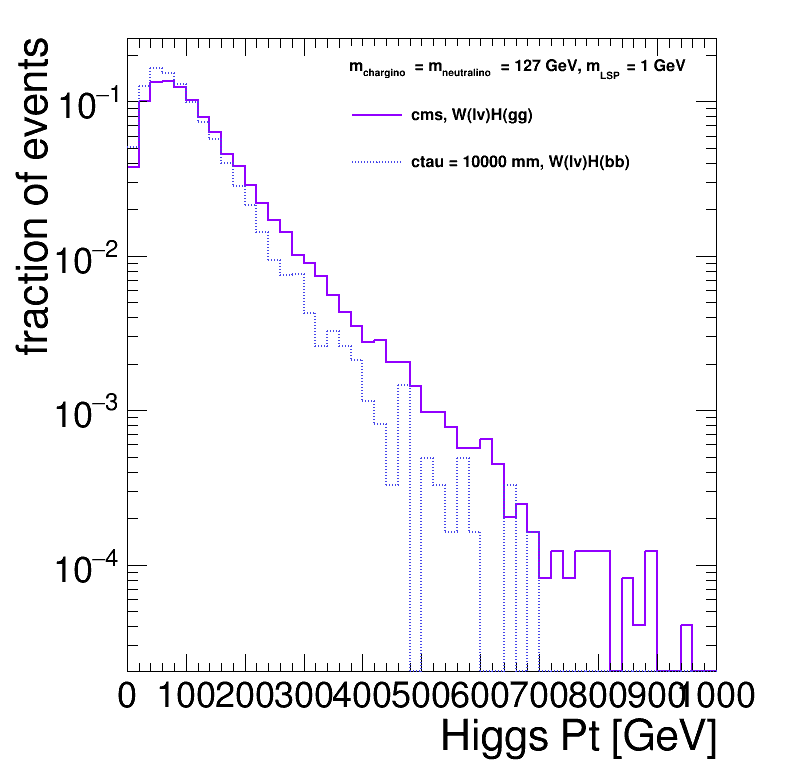

In [6]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

# h = []
h = {}
out_h_save = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    if 'aod' in k:
#     if 'prompt' in k:
        mid = v['gParticleMotherId'].array()
        mindex = v['gParticleMotherIndex'].array()
        pid = v['gParticleId'].array()
        status = v['gParticleStatus'].array()
        pt = v['gParticlePt'].array()

        basic_str = np.logical_and(pid==5, status==23)
 
        print(type(basic_str))
        print(type(basic_str[0]))
        print(basic_str[0][0])
        
        if basic_str[0][0]:
            print('yes')
        else:
            print('no')
            
#         #find pt of mother
#         mpt = find_index(pt, mid) 
    
        #get higgs pt 
#         out_h_pt = []
        out_h_pt_flat = []
        for index1, (value1, value2) in enumerate(zip(pt,mindex)):
#             out_h_pt_1 = []
            for index2, (value3, value4) in enumerate(zip(value1, value2)):
#                 print(index2)
            
                if basic_str[index1][index2]:
                    index = mindex[index1][index2]
                    value = pt[index1][index]
                    out_h_pt_flat.append(value)
 
        

 
        out_h_save[k] = out_h_pt_flat
#         print(k, out_h_save[k][0])


        h[k] = create_TH1D( out_h_pt_flat, axis_title=['Higgs Pt [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
        h[k].SetLineStyle(i+2)
        h[k].SetLineColor(cols[k])
        h[k].SetMarkerColor(cols[k])

        h[k].DrawNormalized('same')

        leg.AddEntry(h[k], texs[k])
 
        i += 1
        print(i)

#     if 'TChi' in k:
    elif 'TChi' in k:
        hpt = v['HPt'].array()
#         met_all =  met.flatten()
        
        h[k] = create_TH1D( hpt, axis_title=['Higgs Pt [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
        h[k].SetLineStyle(1)
        h[k].SetLineColor(cols[k])
        h[k].SetMarkerColor(cols[k])

        h[k].DrawNormalized('same')

        leg.AddEntry(h[k], texs[k])
 
        i += 1
        print(i)
    

leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'h_pt.png')

# Dijet mass


2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_127_1_1pb_weighted.root <TTree b'HggRazorLeptons' at 0x7f17c8799518>
1
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root <TTree b'llp' at 0x7f17c87b71d0>
<class 'awkward.array.jagged.JaggedArray'>
<class 'numpy.ndarray'>
False
no
2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190919/h_mass.png has been created


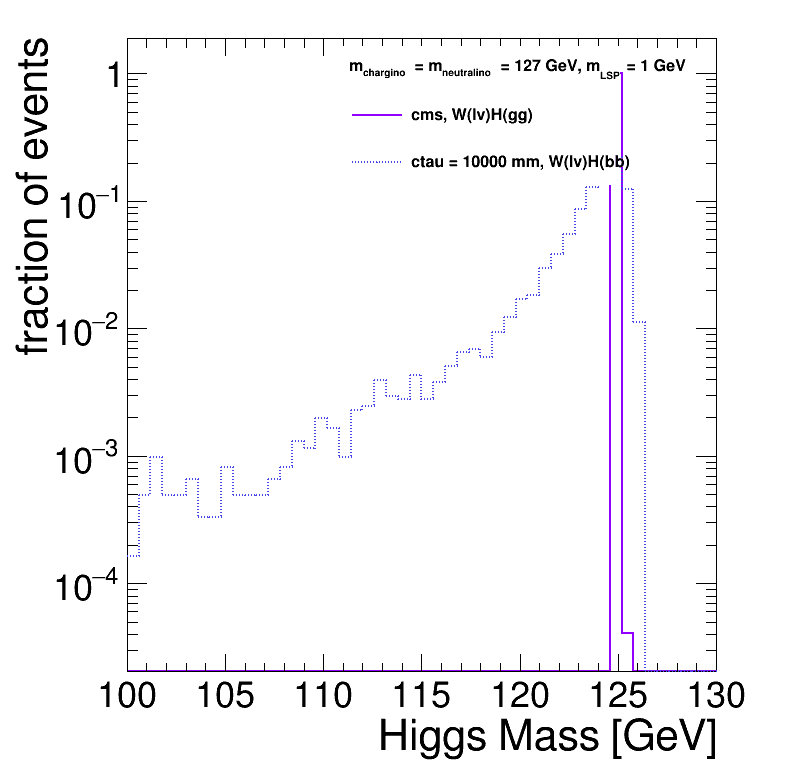

In [7]:
#SetPtEtaPhiE(pt,eta,phi,e)
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

# h = []
h = {}
out_h_save = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    if 'aod' in k:
#     if 'prompt' in k:
        mid = v['gParticleMotherId'].array()
        mindex = v['gParticleMotherIndex'].array()
        pid = v['gParticleId'].array()
        status = v['gParticleStatus'].array()
        
        pt = v['gParticlePt'].array()
        eta = v['gParticleEta'].array()
        phi = v['gParticlePhi'].array()
        e = v['gParticleE'].array()

        basic_str = np.logical_and(pid==5, status==23)
 
        print(type(basic_str))
        print(type(basic_str[0]))
        print(basic_str[0][0])
        
        if basic_str[0][0]:
            print('yes')
        else:
            print('no')
            
#         #find pt of mother
#         mpt = find_index(pt, mid) 
    
        #get higgs pt 
#         out_h_pt = []
        out_h_mass_flat = []
        for index1, (value1, value2) in enumerate(zip(pt,mindex)):
#             out_h_pt_1 = []
            for index2, (value3, value4) in enumerate(zip(value1, value2)):
#                 print(index2)
            
                if basic_str[index1][index2]:
                    index = mindex[index1][index2]
                
                    pt_value = pt[index1][index]
                    eta_value = eta[index1][index]
                    phi_value = phi[index1][index]
                    e_value = e[index1][index]
                    
                    
                    tmp_p4_h    = rt.TLorentzVector()
                    tmp_p4_h.SetPtEtaPhiE(pt_value, eta_value, phi_value, e_value)
                    
                    mass_value = tmp_p4_h.M()
                     
                    out_h_mass_flat.append(mass_value)
        

 
        out_h_save[k] = out_h_mass_flat
#         print(k, out_h_save[k][0])


        h[k] = create_TH1D( out_h_mass_flat, axis_title=['Higgs Mass [GeV]', 'fraction of events'], name="", binning=[50,100,130])
        h[k].SetLineStyle(i+2)
        h[k].SetLineColor(cols[k])
        h[k].SetMarkerColor(cols[k])

        h[k].DrawNormalized('same')

        leg.AddEntry(h[k], texs[k])
 
        i += 1
        print(i)

#     if 'TChi' in k:
    elif 'TChi' in k:
        hpt = v['HMass'].array()
#         met_all =  met.flatten()
        
        h[k] = create_TH1D( hpt, axis_title=['Higgs Mass [GeV]', 'fraction of events'], name="", binning=[50,100,130])
        h[k].SetLineStyle(1)
        h[k].SetLineColor(cols[k])
        h[k].SetMarkerColor(cols[k])

        h[k].DrawNormalized('same')

        leg.AddEntry(h[k], texs[k])
 
        i += 1
        print(i)
    

leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'h_mass.png')

# gen_time

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root <TTree b'llp' at 0x7f2264df3f60>
2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_200_1_1pb_weighted.root <TTree b'HggRazorLeptons' at 0x7f225b0be5c0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190919/gen_time.png has been created


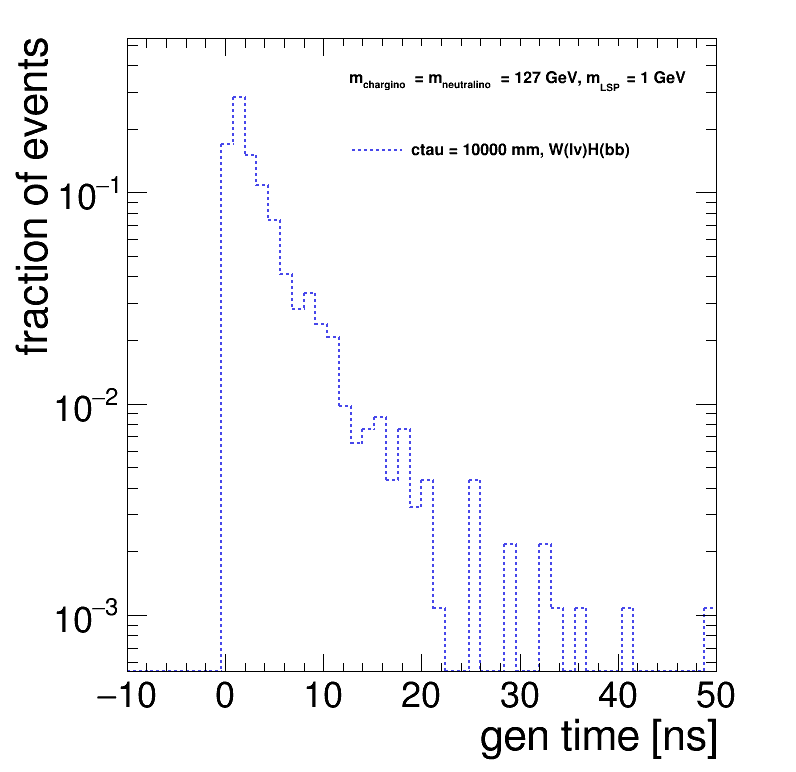

In [35]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

 

for k,v in tree.items(): 
    print(k,v)
    
    if 'aod' in k:
    
        t = v['gen_time'].array()
 

        t_all = t.flatten()
    
#         print(t_all[0:100])

        ht[k] = create_TH1D( t_all, axis_title=['gen time [ns]', 'fraction of events'], name="", binning=[50,-10,50])
        ht[k].SetLineStyle(i+2)
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])

#         ht[k].Draw('same')
        ht[k].DrawNormalized('same')
        ht[k].SetMinimum(0)
        ht[k].SetMaximum(1e+5)

        leg.AddEntry(ht[k], texs[k])
 
        i += 1
    

leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'gen_time.png')

# lifetime

2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_127_1_1pb_weighted.root <TTree b'HggRazorLeptons' at 0x7f17c8799518>
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root <TTree b'llp' at 0x7f17c87b71d0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190919/prod_xyz.png has been created


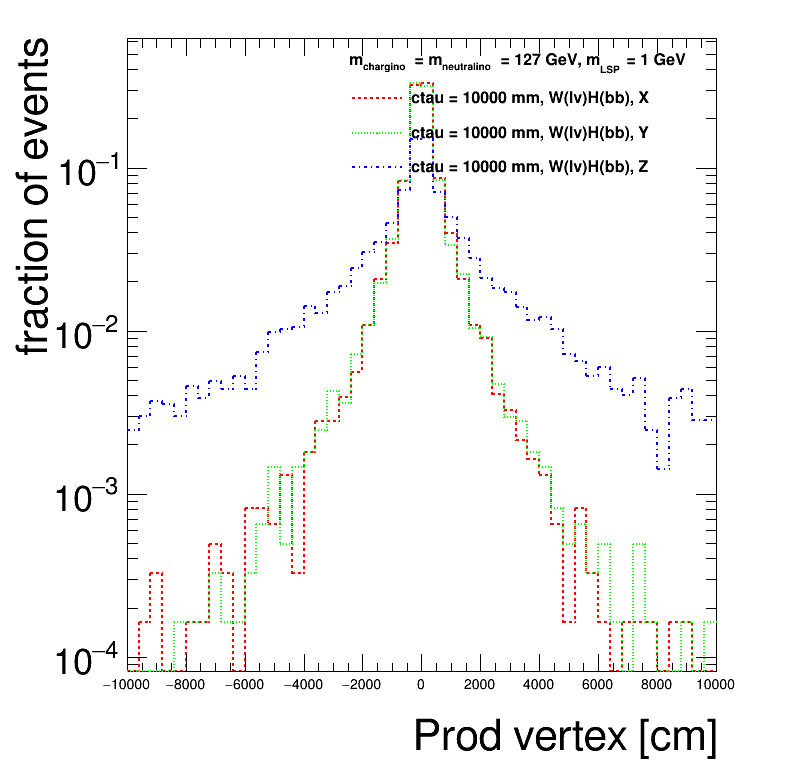

In [8]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}
hy = {}
hz = {}

 

for k,v in tree.items(): 
    print(k,v)
    
 
 
    if 'aod' in k:
    
        pid = v['gParticleId'].array()
        status = v['gParticleStatus'].array()
        pt = v['gParticlePt'].array()
        prod_x = v['gParticleProdVertexX'].array()
        prod_y = v['gParticleProdVertexY'].array()
        prod_z = v['gParticleProdVertexZ'].array()

        basic_str = np.logical_and(pid==5, status==23)

        b_x = prod_x[basic_str]
        b_y = prod_y[basic_str]
        b_z = prod_z[basic_str]

        b_x_all = b_x.flatten()
        b_y_all = b_y.flatten()
        b_z_all = b_z.flatten()

        ht[k] = create_TH1D( b_x_all, axis_title=['Prod vertex [cm]', 'fraction of events'], name="", binning=[50,-10000,10000])
        ht[k].SetLineStyle(i+2)
        ht[k].SetLineColor(i+2)
        ht[k].SetMarkerColor(cols[k])
        ht[k].GetXaxis().SetLabelSize(0.02)
#         ht[k].GetYaxis().SetRangeUser(0, 1e+5)
        
        hy[k] = create_TH1D( b_y_all, axis_title=['Prod vertex [cm]', 'fraction of events'], name="", binning=[50,-10000,10000])
        hy[k].SetLineStyle(i+3)
        hy[k].SetLineColor(i+3)
        hy[k].SetMarkerColor(cols[k])
        hy[k].GetXaxis().SetLabelSize(0.02)
        
        hz[k] = create_TH1D( b_z_all, axis_title=['Prod vertex [cm]', 'fraction of events'], name="", binning=[50,-10000,10000])
        hz[k].SetLineStyle(i+4)
        hz[k].SetLineColor(i+4)
        hz[k].SetMarkerColor(i+4)
        hz[k].GetXaxis().SetLabelSize(0.02)

#         ht[k].Draw('same')
#         hy[k].Draw('same')
#         hz[k].Draw('same')
        ht[k].DrawNormalized('same')
        hy[k].DrawNormalized('same')
        hz[k].DrawNormalized('same')

        ht[k].GetYaxis().SetRangeUser(0, 1e+5)

        leg.AddEntry(ht[k], texs[k]+', X')
        leg.AddEntry(hy[k], texs[k]+', Y')
        leg.AddEntry(hz[k], texs[k]+', Z')
 
        i += 1
    

leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'prod_xyz.png')

2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_127_1_1pb_weighted.root <TTree b'HggRazorLeptons' at 0x7f17c8799518>
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root <TTree b'llp' at 0x7f17c87b71d0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190919/prod_r.png has been created


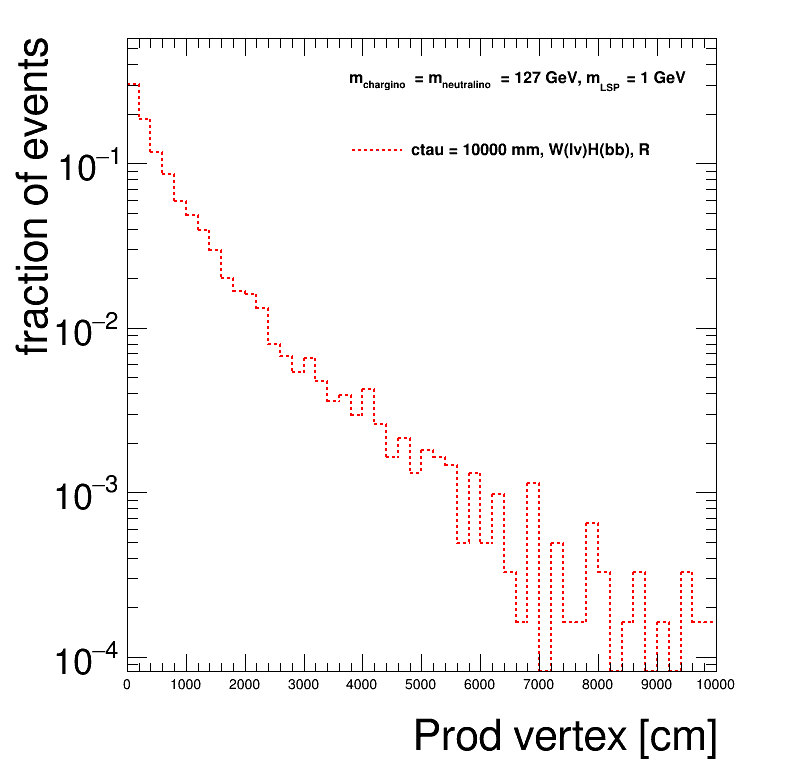

In [9]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}
hy = {}
hz = {}

 

for k,v in tree.items(): 
    print(k,v)
    
 
 
    if 'aod' in k:
    
        pid = v['gParticleId'].array()
        status = v['gParticleStatus'].array()
        pt = v['gParticlePt'].array()
        prod_x = v['gParticleProdVertexX'].array()
        prod_y = v['gParticleProdVertexY'].array()
        prod_z = v['gParticleProdVertexZ'].array()

        basic_str = np.logical_and(pid==5, status==23)

        b_x = prod_x[basic_str]
        b_y = prod_y[basic_str]
        b_z = prod_z[basic_str]

        b_x_all = b_x.flatten()
        b_y_all = b_y.flatten()
        b_z_all = b_z.flatten()

#         print(rt.TMath.Sqrt(2))
        b_r_all = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(b_x_all, b_y_all)]

        ht[k] = create_TH1D( b_r_all, axis_title=['Prod vertex [cm]', 'fraction of events'], name="", binning=[50,-0000,10000])
        ht[k].SetLineStyle(i+2)
        ht[k].SetLineColor(i+2)
        ht[k].SetMarkerColor(cols[k])
        ht[k].GetXaxis().SetLabelSize(0.02)
#         ht[k].GetYaxis().SetRangeUser(0, 1e+5)
        
 
        
        hz[k] = create_TH1D( b_z_all, axis_title=['Prod vertex [cm]', 'fraction of events'], name="", binning=[50,-10000,10000])
        hz[k].SetLineStyle(i+4)
        hz[k].SetLineColor(i+4)
        hz[k].SetMarkerColor(i+4)
        hz[k].GetXaxis().SetLabelSize(0.02)

#         ht[k].Draw('same')
#         hy[k].Draw('same')
#         hz[k].Draw('same')
        ht[k].DrawNormalized('same')
#         ht[k].DrawNormalized('same')
      

      

        leg.AddEntry(ht[k], texs[k]+', R')
        
#         leg.AddEntry(hz[k], texs[k]+', Z')
 
        i += 1
    

leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'prod_r.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root <TTree b'llp' at 0x7f2264df3f60>
2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_200_1_1pb_weighted.root <TTree b'HggRazorLeptons' at 0x7f225b0be5c0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190919/prod_d.png has been created


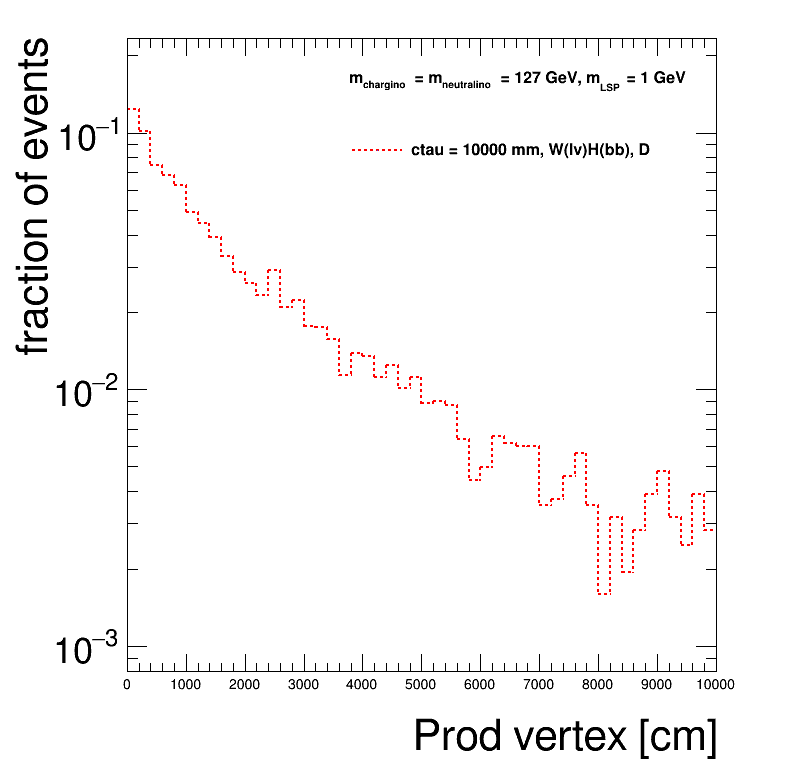

In [38]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}
hy = {}
hz = {}

 

for k,v in tree.items(): 
    print(k,v)
    
 
 
    if 'aod' in k:
    
        pid = v['gParticleId'].array()
        status = v['gParticleStatus'].array()
        pt = v['gParticlePt'].array()
        prod_x = v['gParticleProdVertexX'].array()
        prod_y = v['gParticleProdVertexY'].array()
        prod_z = v['gParticleProdVertexZ'].array()

        basic_str = np.logical_and(pid==5, status==23)

        b_x = prod_x[basic_str]
        b_y = prod_y[basic_str]
        b_z = prod_z[basic_str]

        b_x_all = b_x.flatten()
        b_y_all = b_y.flatten()
        b_z_all = b_z.flatten()

#         print(rt.TMath.Sqrt(2))
        b_r_all = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(b_x_all, b_y_all)]
        b_d_all = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(b_r_all, b_z_all)]
    

        ht[k] = create_TH1D( b_d_all, axis_title=['Prod vertex [cm]', 'fraction of events'], name="", binning=[50,-0000,10000])
        ht[k].SetLineStyle(i+2)
        ht[k].SetLineColor(i+2)
        ht[k].SetMarkerColor(cols[k])
        ht[k].GetXaxis().SetLabelSize(0.02)

        ht[k].DrawNormalized('same')
 

      

        leg.AddEntry(ht[k], texs[k]+', D')
        
 
 
        i += 1
    

leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'prod_d.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root <TTree b'llp' at 0x7f2264df3f60>
<class 'awkward.array.jagged.JaggedArray'>
<class 'numpy.ndarray'>
False
no
1
2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_200_1_1pb_weighted.root <TTree b'HggRazorLeptons' at 0x7f225b0be5c0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190919/h_px.png has been created


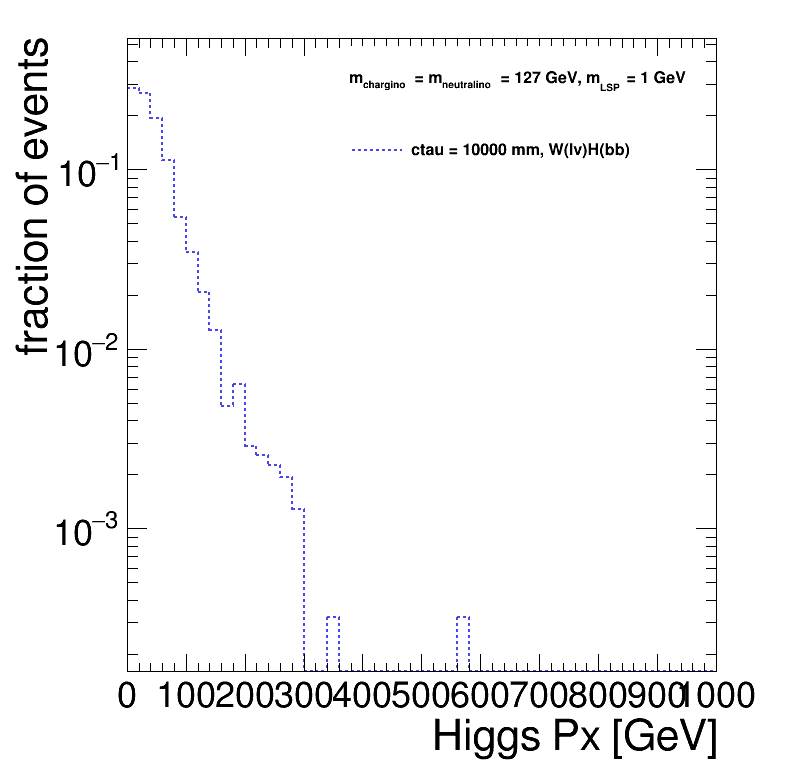

In [39]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

# h = []
h = {}
out_hpt_save = {}
out_hpx_save = {}
out_hpy_save = {}
out_hpz_save = {}
out_he_save = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    if 'aod' in k:
#     if 'prompt' in k:
        mid = v['gParticleMotherId'].array()
        mindex = v['gParticleMotherIndex'].array()
        pid = v['gParticleId'].array()
        status = v['gParticleStatus'].array()
        pt = v['gParticlePt'].array()
        px = v['gParticlePx'].array()
        py = v['gParticlePy'].array()
        pz = v['gParticlePz'].array()
        e = v['gParticleE'].array()

        basic_str = np.logical_and(pid==5, status==23)
 
        print(type(basic_str))
        print(type(basic_str[0]))
        print(basic_str[0][0])
        
        if basic_str[0][0]:
            print('yes')
        else:
            print('no')
            
#         #find pt of mother
#         mpt = find_index(pt, mid) 
    
        #get higgs info 
        out_h_pt_flat = []
        out_h_px_flat = []
        out_h_py_flat = []
        out_h_pz_flat = []
        out_h_e_flat = []
        for index1, (value1, value2) in enumerate(zip(pt,mindex)):
            for index2, (value3, value4) in enumerate(zip(value1, value2)):
                if basic_str[index1][index2]:
                    index = mindex[index1][index2]
                    value = pt[index1][index]
                    out_h_pt_flat.append(value)
                    out_h_px_flat.append(px[index1][index2])
                    out_h_py_flat.append(py[index1][index2])
                    out_h_pz_flat.append(pz[index1][index2])
                    out_h_e_flat.append(e[index1][index2])
 
 
        out_hpt_save[k] = out_h_pt_flat
        out_hpx_save[k] = out_h_px_flat
        out_hpy_save[k] = out_h_py_flat
        out_hpz_save[k] = out_h_pz_flat
        out_he_save[k] = out_h_e_flat


        h[k] = create_TH1D( out_h_px_flat, axis_title=['Higgs Px [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
        h[k].SetLineStyle(i+2)
        h[k].SetLineColor(cols[k])
        h[k].SetMarkerColor(cols[k])

        h[k].DrawNormalized('same')

        leg.AddEntry(h[k], texs[k])
 
        i += 1
        print(i)

 
    

leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'h_px.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root <TTree b'llp' at 0x7f2264df3f60>
1
2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_200_1_1pb_weighted.root <TTree b'HggRazorLeptons' at 0x7f225b0be5c0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190919/h_py.png has been created


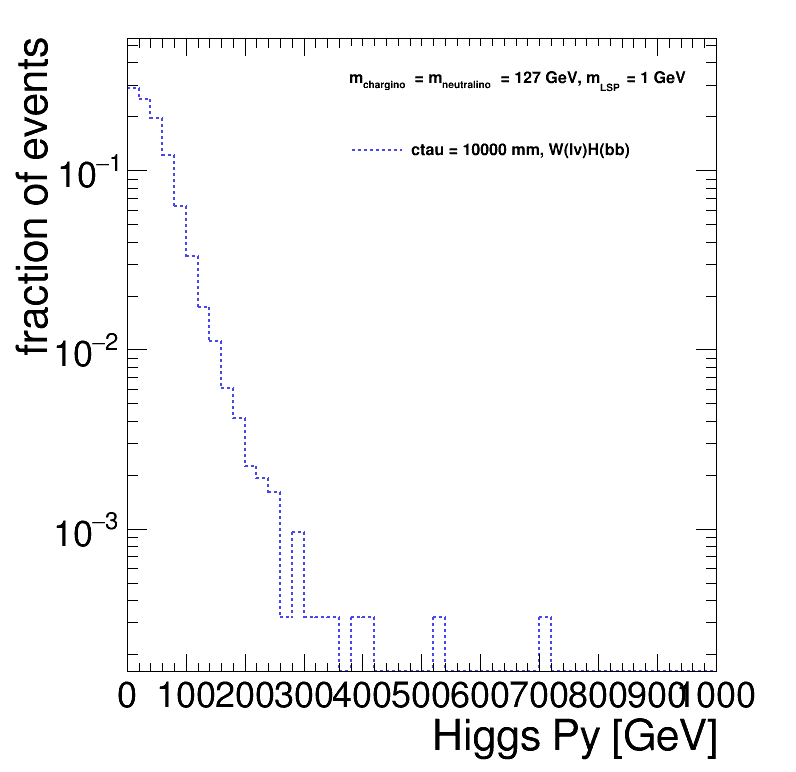

In [40]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

# h = []
h = {}
 
for k,v in tree.items(): 
    print(k,v)
    
    if 'aod' in k:
 
 
        out_h_py_flat = out_hpy_save[k]
      


        h[k] = create_TH1D( out_h_py_flat, axis_title=['Higgs Py [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
        h[k].SetLineStyle(i+2)
        h[k].SetLineColor(cols[k])
        h[k].SetMarkerColor(cols[k])

        h[k].DrawNormalized('same')

        leg.AddEntry(h[k], texs[k])
 
        i += 1
        print(i)

 
    

leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'h_py.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root <TTree b'llp' at 0x7f2264df3f60>
[-123.012695, 24.275986, 60.886917, -5.4474673, -72.23176, -35.529327, 84.98934, -58.896526, -30.16101, -9.218496]
[516.3952, -15.186242, 69.740395, -287.53644, -63.896744, 423.79343, -92.64104, 39.2374, -183.4383, 231.53691]
1
2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_200_1_1pb_weighted.root <TTree b'HggRazorLeptons' at 0x7f225b0be5c0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190919/h_pz.png has been created


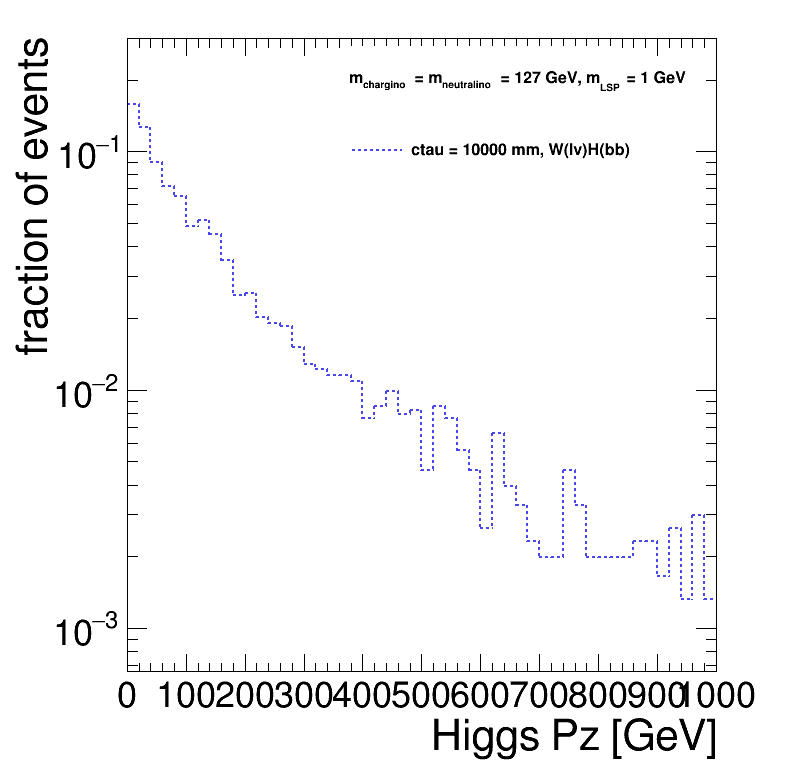

In [41]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

# h = []
h = {}
 
for k,v in tree.items(): 
    print(k,v)
    
    if 'aod' in k:
 
 
        out_h_py_flat = out_hpy_save[k]
        out_h_pz_flat = out_hpz_save[k]
        
        print(out_h_py_flat[0:10])
        print(out_h_pz_flat[0:10])
      


        h[k] = create_TH1D( out_h_pz_flat, axis_title=['Higgs Pz [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
        h[k].SetLineStyle(i+2)
        h[k].SetLineColor(cols[k])
        h[k].SetMarkerColor(cols[k])

        h[k].DrawNormalized('same')

        leg.AddEntry(h[k], texs[k])
 
        i += 1
        print(i)

 
    

leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'h_pz.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root <TTree b'llp' at 0x7f2264df3f60>
1
2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_200_1_1pb_weighted.root <TTree b'HggRazorLeptons' at 0x7f225b0be5c0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190919/h_momentum.png has been created


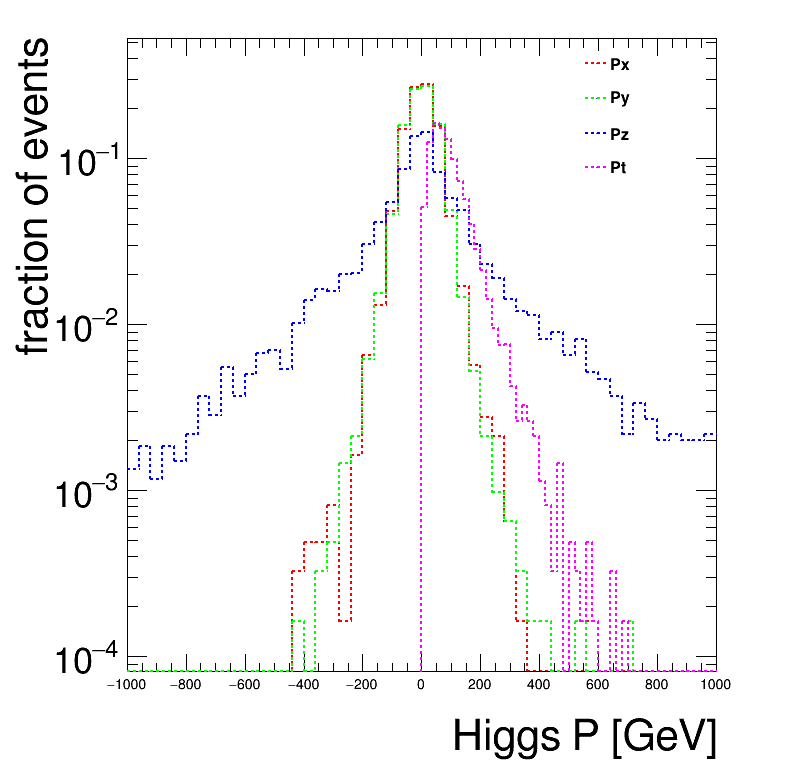

In [42]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.73,0.76,0.88,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

# h = []
hpt = {}
hpx = {}
hpy = {}
hpz = {}
hpr = {}
 
for k,v in tree.items(): 
    print(k,v)
    
    if 'aod' in k:
 
 
        out_h_pt_flat = out_hpt_save[k]
        out_h_px_flat = out_hpx_save[k]
        out_h_py_flat = out_hpy_save[k]
        out_h_pz_flat = out_hpz_save[k]
        
#         print(out_h_py_flat[0:10])
#         print(out_h_pz_flat[0:10])

        hpx[k] = create_TH1D( out_h_px_flat, axis_title=['Higgs P [GeV]', 'fraction of events'], name="", binning=[50,-1000,1000])
        hpx[k].SetLineStyle(i+2)
        hpx[k].SetLineColor(2)
        hpx[k].SetMarkerColor(cols[k])
        hpx[k].GetXaxis().SetLabelSize(0.02)

        hpx[k].DrawNormalized('same')

        leg.AddEntry(hpx[k], 'Px')
      
        hpy[k] = create_TH1D( out_h_py_flat, axis_title=['Higgs Pz [GeV]', 'fraction of events'], name="", binning=[50,-1000,1000])
        hpy[k].SetLineStyle(i+2)
        hpy[k].SetLineColor(3)
        hpy[k].SetMarkerColor(cols[k])

        hpy[k].DrawNormalized('same')

        leg.AddEntry(hpy[k],  'Py')

        hpz[k] = create_TH1D( out_h_pz_flat, axis_title=['Higgs Pz [GeV]', 'fraction of events'], name="", binning=[50,-1000,1000])
        hpz[k].SetLineStyle(i+2)
        hpz[k].SetLineColor(4)
        hpz[k].SetMarkerColor(cols[k])

        hpz[k].DrawNormalized('same')

        leg.AddEntry(hpz[k], 'Pz')

        hpt[k] = create_TH1D( out_h_pt_flat, axis_title=['Higgs Pz [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
        hpt[k].SetLineStyle(i+2)
        hpt[k].SetLineColor(6)
        hpt[k].SetMarkerColor(cols[k])

        hpt[k].DrawNormalized('same')

        leg.AddEntry(hpt[k], 'Pt')
 
        i += 1
        print(i)

 
    

# leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'h_momentum.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root <TTree b'llp' at 0x7f2264df3f60>
1
2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_200_1_1pb_weighted.root <TTree b'HggRazorLeptons' at 0x7f225b0be5c0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190919/h_momentum.png has been created


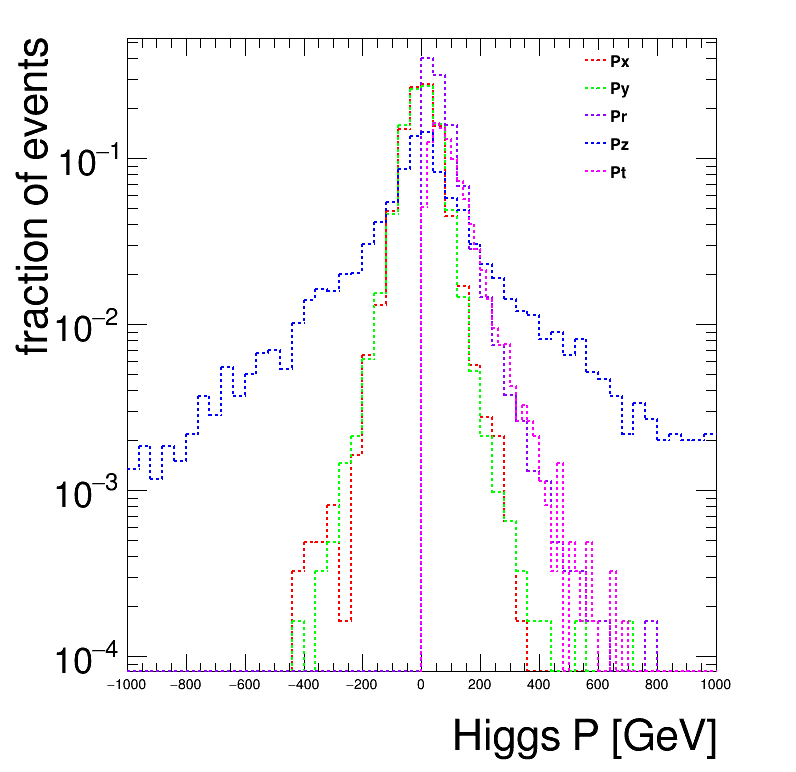

In [43]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.73,0.76,0.88,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

# h = []
hpt = {}
hpx = {}
hpy = {}
hpz = {}
hpr = {}
 
for k,v in tree.items(): 
    print(k,v)
    
    if 'aod' in k:
 
 
        out_h_pt_flat = out_hpt_save[k]
        out_h_px_flat = out_hpx_save[k]
        out_h_py_flat = out_hpy_save[k]
        out_h_pz_flat = out_hpz_save[k]
        
#         print(out_h_py_flat[0:10])
#         print(out_h_pz_flat[0:10])

        hpx[k] = create_TH1D( out_h_px_flat, axis_title=['Higgs P [GeV]', 'fraction of events'], name="", binning=[50,-1000,1000])
        hpx[k].SetLineStyle(i+2)
        hpx[k].SetLineColor(2)
        hpx[k].SetMarkerColor(cols[k])
        hpx[k].GetXaxis().SetLabelSize(0.02)

        hpx[k].DrawNormalized('same')

        leg.AddEntry(hpx[k], 'Px')
      
        hpy[k] = create_TH1D( out_h_py_flat, axis_title=['Higgs Pz [GeV]', 'fraction of events'], name="", binning=[50,-1000,1000])
        hpy[k].SetLineStyle(i+2)
        hpy[k].SetLineColor(3)
        hpy[k].SetMarkerColor(cols[k])

        hpy[k].DrawNormalized('same')

        leg.AddEntry(hpy[k],  'Py')
        
        out_h_pr_flat = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(out_h_px_flat, out_h_px_flat)]
        
        hpr[k] = create_TH1D( out_h_pr_flat, axis_title=['Higgs Pz [GeV]', 'fraction of events'], name="", binning=[50,-1000,1000])
        hpr[k].SetLineStyle(i+2)
        hpr[k].SetLineColor(51)
        hpr[k].SetMarkerColor(cols[k])

        hpr[k].DrawNormalized('same')

        leg.AddEntry(hpr[k],  'Pr')

        hpz[k] = create_TH1D( out_h_pz_flat, axis_title=['Higgs Pz [GeV]', 'fraction of events'], name="", binning=[50,-1000,1000])
        hpz[k].SetLineStyle(i+2)
        hpz[k].SetLineColor(4)
        hpz[k].SetMarkerColor(cols[k])

        hpz[k].DrawNormalized('same')

        leg.AddEntry(hpz[k], 'Pz')

        hpt[k] = create_TH1D( out_h_pt_flat, axis_title=['Higgs Pz [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
        hpt[k].SetLineStyle(i+2)
        hpt[k].SetLineColor(6)
        hpt[k].SetMarkerColor(cols[k])

        hpt[k].DrawNormalized('same')

        leg.AddEntry(hpt[k], 'Pt')
 
        i += 1
        print(i)

 
    

# leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'h_momentum.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root <TTree b'llp' at 0x7f2264df3f60>
1
2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_200_1_1pb_weighted.root <TTree b'HggRazorLeptons' at 0x7f225b0be5c0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190919/h_momentum_transverse.png has been created


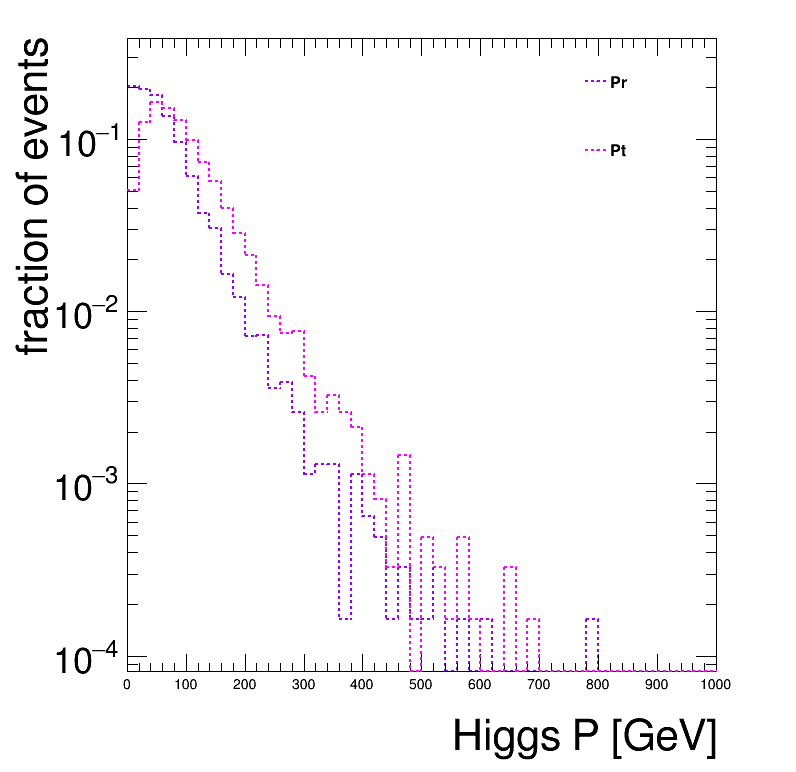

In [44]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.73,0.76,0.88,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

# h = []
hpt = {}
hpx = {}
hpy = {}
hpz = {}
hpr = {}
 
for k,v in tree.items(): 
    print(k,v)
    
    if 'aod' in k:
 
 
        out_h_pt_flat = out_hpt_save[k]
        out_h_px_flat = out_hpx_save[k]
        out_h_py_flat = out_hpy_save[k]
        out_h_pz_flat = out_hpz_save[k]
        
#         print(out_h_py_flat[0:10])
#         print(out_h_pz_flat[0:10])

 
        
        out_h_pr_flat = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(out_h_px_flat, out_h_px_flat)]
        
        hpr[k] = create_TH1D( out_h_pr_flat, axis_title=['Higgs P [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
        hpr[k].SetLineStyle(i+2)
        hpr[k].SetLineColor(51)
        hpr[k].SetMarkerColor(cols[k])
        hpr[k].GetXaxis().SetLabelSize(0.02)

        hpr[k].DrawNormalized('same')

        leg.AddEntry(hpr[k],  'Pr')

  

        hpt[k] = create_TH1D( out_h_pt_flat, axis_title=['Higgs Pz [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
        hpt[k].SetLineStyle(i+2)
        hpt[k].SetLineColor(6)
        hpt[k].SetMarkerColor(cols[k])

        hpt[k].DrawNormalized('same')

        leg.AddEntry(hpt[k], 'Pt')
 
        i += 1
        print(i)

 
    

# leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'h_momentum_transverse.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root <TTree b'llp' at 0x7f2264df3f60>
1
2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_200_1_1pb_weighted.root <TTree b'HggRazorLeptons' at 0x7f225b0be5c0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190919/h_momentum_squared_sum.png has been created


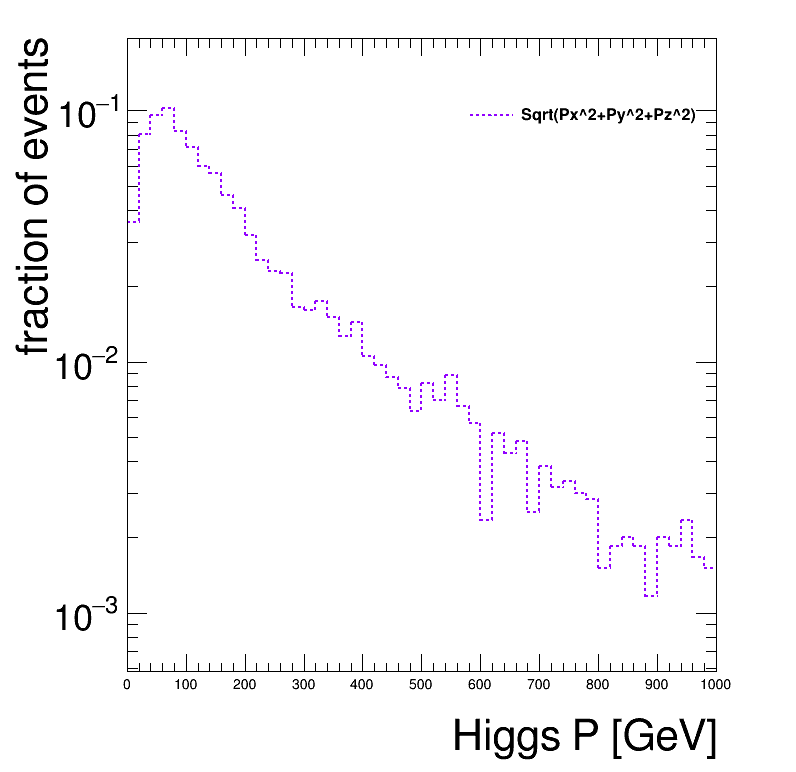

In [45]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.58,0.76,0.88,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

# h = []
hpt = {}
hpx = {}
hpy = {}
hpz = {}
hpr = {}
hp = {}
 
for k,v in tree.items(): 
    print(k,v)
    
    if 'aod' in k:
 
 
        out_h_pt_flat = out_hpt_save[k]
        out_h_px_flat = out_hpx_save[k]
        out_h_py_flat = out_hpy_save[k]
        out_h_pz_flat = out_hpz_save[k]
        
#         print(out_h_py_flat[0:10])
#         print(out_h_pz_flat[0:10])

 
        
        out_h_pr_flat = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(out_h_px_flat, out_h_px_flat)]
        out_h_p_flat = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(out_h_pr_flat, out_h_pz_flat)]
        
        hp[k] = create_TH1D( out_h_p_flat, axis_title=['Higgs P [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
        hp[k].SetLineStyle(i+2)
        hp[k].SetLineColor(51)
        hp[k].SetMarkerColor(cols[k])
        hp[k].GetXaxis().SetLabelSize(0.02)

        hp[k].DrawNormalized('same')

        leg.AddEntry(hp[k],  'Sqrt(Px^2+Py^2+Pz^2)')

  
 
        i += 1
        print(i)

 
    

# leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'h_momentum_squared_sum.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root <TTree b'llp' at 0x7f2264df3f60>
1
2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_200_1_1pb_weighted.root <TTree b'HggRazorLeptons' at 0x7f225b0be5c0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190919/h_e.png has been created


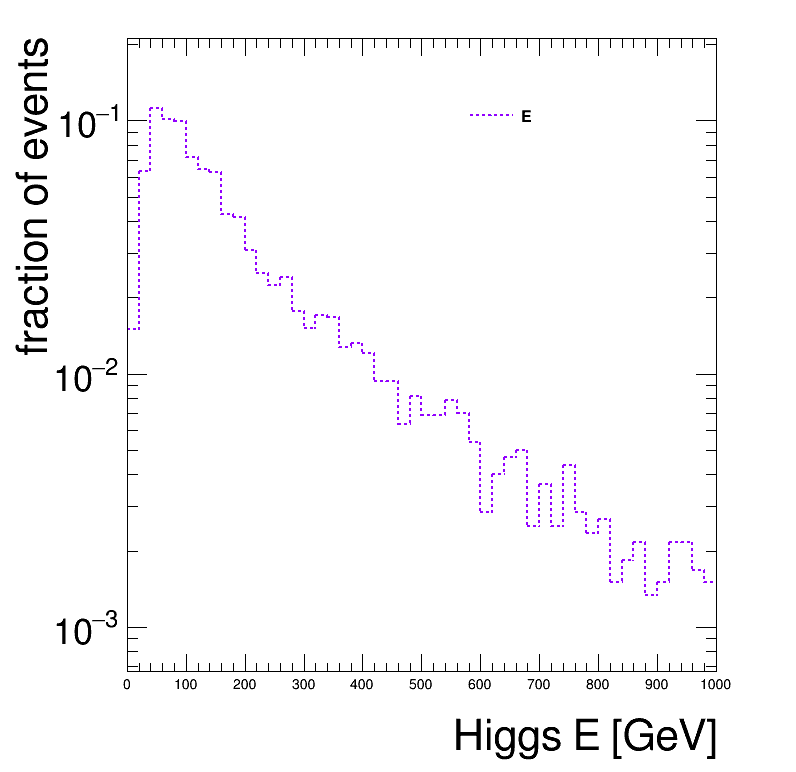

In [46]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.58,0.76,0.88,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

# h = []
hpt = {}
hpx = {}
hpy = {}
hpz = {}
hpr = {}
hp = {}
he = {}
 
for k,v in tree.items(): 
    print(k,v)
    
    if 'aod' in k:
 
 
        out_h_pt_flat = out_hpt_save[k]
        out_h_px_flat = out_hpx_save[k]
        out_h_py_flat = out_hpy_save[k]
        out_h_pz_flat = out_hpz_save[k]
        out_h_e_flat = out_he_save[k]
        
#         print(out_h_py_flat[0:10])
#         print(out_h_pz_flat[0:10])

 
        
  
        
        he[k] = create_TH1D( out_h_e_flat, axis_title=['Higgs E [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
        he[k].SetLineStyle(i+2)
        he[k].SetLineColor(51)
        he[k].SetMarkerColor(cols[k])
        he[k].GetXaxis().SetLabelSize(0.02)

        he[k].DrawNormalized('same')

        leg.AddEntry(he[k],  'E')

  
 
        i += 1
        print(i)

 
    

# leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'h_e.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root <TTree b'llp' at 0x7f2264df3f60>
1
2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_200_1_1pb_weighted.root <TTree b'HggRazorLeptons' at 0x7f225b0be5c0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190919/h_p_over_e.png has been created


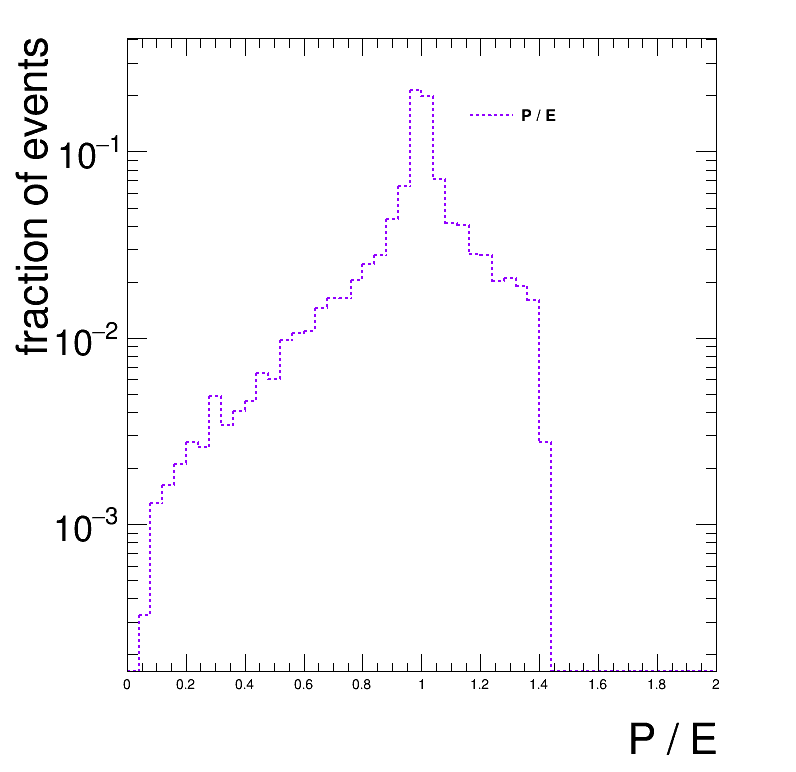

In [47]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.58,0.76,0.88,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

# h = []
hpt = {}
hpx = {}
hpy = {}
hpz = {}
hpr = {}
hp = {}
he = {}
hr = {}
 
for k,v in tree.items(): 
    print(k,v)
    
    if 'aod' in k:
 
 
        out_h_pt_flat = out_hpt_save[k]
        out_h_px_flat = out_hpx_save[k]
        out_h_py_flat = out_hpy_save[k]
        out_h_pz_flat = out_hpz_save[k]
        out_h_e_flat = out_he_save[k]
        
#         print(out_h_py_flat[0:10])
#         print(out_h_pz_flat[0:10])
        out_h_pr_flat = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(out_h_px_flat, out_h_px_flat)]
        out_h_p_flat = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(out_h_pr_flat, out_h_pz_flat)]
        
        out_h_r_flat = [x/y for x,y in zip(out_h_p_flat, out_h_e_flat)]
        
  
        
        hr[k] = create_TH1D( out_h_r_flat, axis_title=['P / E', 'fraction of events'], name="", binning=[50,-0,2])
        hr[k].SetLineStyle(i+2)
        hr[k].SetLineColor(51)
        hr[k].SetMarkerColor(cols[k])
        hr[k].GetXaxis().SetLabelSize(0.02)

        hr[k].DrawNormalized('same')

        leg.AddEntry(hr[k],  'P / E')

  
 
        i += 1
        print(i)

 
    

# leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'h_p_over_e.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root <TTree b'llp' at 0x7f2264df3f60>
[-0.02488128 -0.02559349 -0.02423507 -0.02554038 -0.02600406 -0.02535346
 -0.02461208 -0.02536638 -0.02424843 -0.02518431]
2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_200_1_1pb_weighted.root <TTree b'HggRazorLeptons' at 0x7f225b0be5c0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190919/prod_llp.png has been created


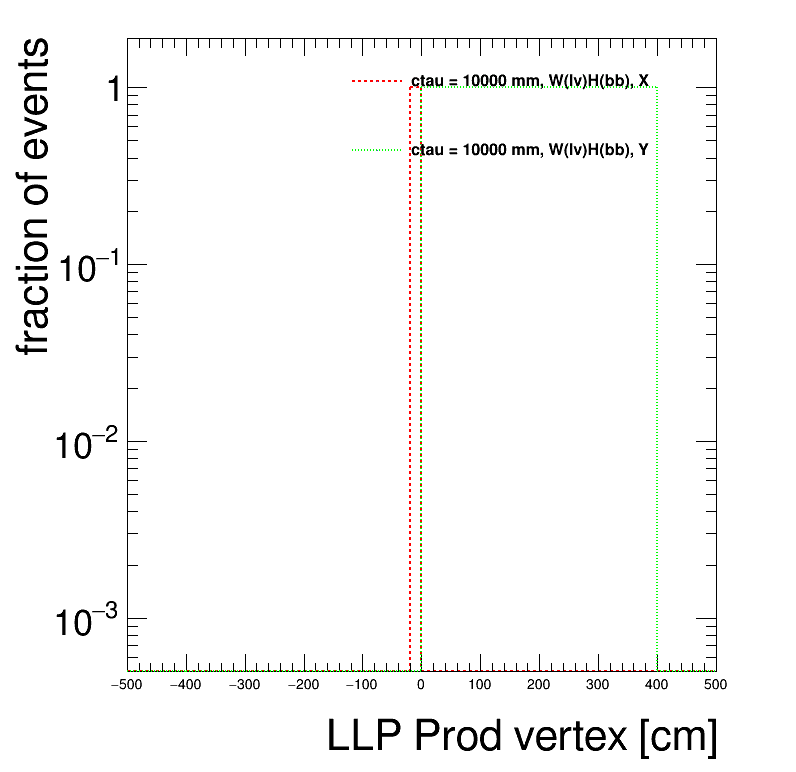

In [48]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}
hy = {}
hz = {}
hct = {}

 

for k,v in tree.items(): 
    print(k,v)
    
 
 
    if 'aod' in k:
    
        pid = v['gParticleId'].array()
        status = v['gParticleStatus'].array()
        pt = v['gParticlePt'].array()
        prod_x = v['gParticleProdVertexX'].array()
        prod_y = v['gParticleProdVertexY'].array()
        prod_z = v['gParticleProdVertexZ'].array()

        basic_str = np.logical_and(pid==1000023, status==22)

        llp_x = prod_x[basic_str]
        llp_y = prod_y[basic_str]
        llp_z = prod_z[basic_str]

        llp_x_all = llp_x.flatten()
        llp_y_all = llp_y.flatten()
        llp_z_all = llp_z.flatten()


        llp_r_all = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(llp_x_all, llp_y_all)]
        llp_d_all = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(llp_r_all, llp_z_all)]
        
 
        ht[k] = create_TH1D( llp_x_all, axis_title=['LLP Prod vertex [cm]', 'fraction of events'], name="", binning=[50,-500,500])
        ht[k].SetLineStyle(i+2)
        ht[k].SetLineColor(i+2)
        ht[k].SetMarkerColor(cols[k])
        ht[k].GetXaxis().SetLabelSize(0.02)
#         ht[k].GetYaxis().SetRangeUser(0, 1e+5)

        print(llp_x_all[0:10])
        
        hy[k] = create_TH1D( llp_y_all, axis_title=['Prod vertex [cm]', 'fraction of events'], name="", binning=[50,-10000,10000])
        hy[k].SetLineStyle(i+3)
        hy[k].SetLineColor(i+3)
        hy[k].SetMarkerColor(cols[k])
        hy[k].GetXaxis().SetLabelSize(0.02)
        
        hz[k] = create_TH1D( llp_z_all, axis_title=['Prod vertex [cm]', 'fraction of events'], name="", binning=[50,-10000,10000])
        hz[k].SetLineStyle(i+4)
        hz[k].SetLineColor(i+4)
        hz[k].SetMarkerColor(i+4)
        hz[k].GetXaxis().SetLabelSize(0.02)

#         ht[k].Draw('same')
#         hy[k].Draw('same')
#         hz[k].Draw('same')
        ht[k].DrawNormalized('same')
        hy[k].DrawNormalized('same')
#         hz[k].DrawNormalized('same')

        ht[k].GetYaxis().SetRangeUser(0, 1e+5)

        leg.AddEntry(ht[k], texs[k]+', X')
        leg.AddEntry(hy[k], texs[k]+', Y')
#         leg.AddEntry(hz[k], texs[k]+', Z')
 
 
 
        i += 1
    

# leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
# c.SetLogx()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'prod_llp.png')

# ctau

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root <TTree b'llp' at 0x7f2264df3f60>
2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_200_1_1pb_weighted.root <TTree b'HggRazorLeptons' at 0x7f225b0be5c0>
 FCN=59.6601 FROM MIGRAD    STATUS=CONVERGED      63 CALLS          64 TOTAL
                     EDM=1.24414e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.40240e+00   1.85032e-02   4.87519e-05   3.04563e-02
   2  Slope       -9.90139e-04   1.32972e-05   3.50314e-08   5.39002e+01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190919/decay_ctau_beta.png has been created


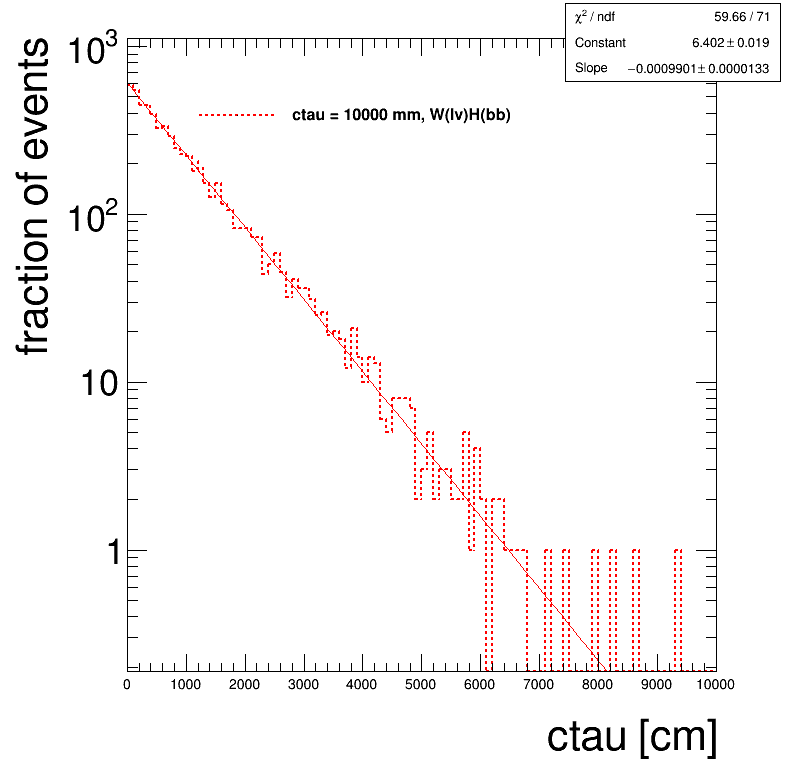

In [49]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.23,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}
hy = {}
hz = {}
hct = {}

 

for k,v in tree.items(): 
    print(k,v)
    
 
 
    if 'aod' in k:
    
 
        
        beta = v['gLLP_beta'].array()
 
        decay_x = v['gLLP_decay_vertex_x'].array()
        decay_y = v['gLLP_decay_vertex_y'].array()
        decay_z = v['gLLP_decay_vertex_z'].array()

#         h_x_all = decay_x.flatten()
#         h_y_all = decay_y.flatten()
#         h_z_all = decay_z.flatten()
        
#         h_beta_all = beta.flatten()
        h_x_all = decay_x[:,0]
        h_y_all = decay_y[:,0]
        h_z_all = decay_z[:,0]
        
        h_beta_all = beta[:,0]

        h_r_all = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(h_x_all, h_y_all)]
        h_d_all = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(h_r_all, h_z_all)]
        
        out_h_ct_flat = [x/y*(rt.TMath.Sqrt(1-pow(y ,2))) for x,y in zip(h_d_all, h_beta_all)]
        
    

        hct[k] = create_TH1D( out_h_ct_flat, axis_title=['ctau [cm]', 'fraction of events'], name="", binning=[100,-0,10000])
        hct[k].SetLineStyle(i+2)
        hct[k].SetLineColor(i+2)
#         hct[k].SetMarkerColor(cols[k])
        hct[k].GetXaxis().SetLabelSize(0.02)

        hct[k].Draw('same')
#         hct[k].DrawNormalized('same')
        hct[k].Fit('expo')
#         hct[k].Fit('expo','','',10,20000)
 

      

        leg.AddEntry(hct[k], texs[k])
        
 
 
        i += 1
    

# leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
# c.SetLogx()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'decay_ctau_beta.png')

# MCHi

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_V2_aod_lhe.root <TTree b'llp' at 0x7f2264df3f60>
2016-SMS-TChiWH_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_200_1_1pb_weighted.root <TTree b'HggRazorLeptons' at 0x7f225b0be5c0>
 FCN=59.6601 FROM MIGRAD    STATUS=CONVERGED      63 CALLS          64 TOTAL
                     EDM=1.2518e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.40240e+00   1.85032e-02   4.87519e-05   3.05494e-02
   2  Slope       -9.90139e-04   1.32972e-05   3.50313e-08   5.40659e+01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190919/mchi.png has been created


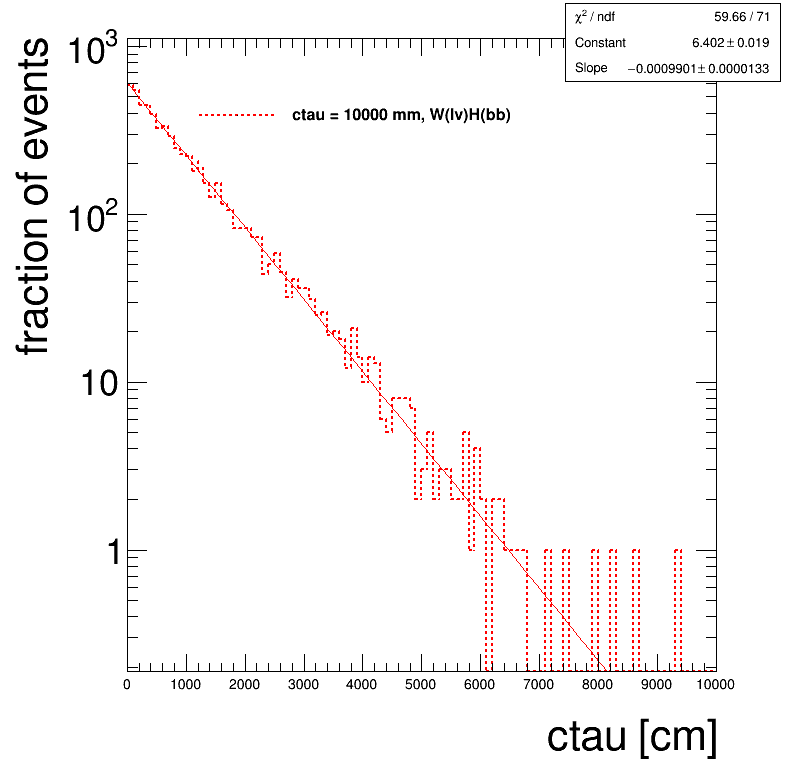

In [50]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.23,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}
hy = {}
hz = {}
hct = {}

 

for k,v in tree.items(): 
    print(k,v)
    
 
 
    if 'aod' in k:
    
 
        
        beta = v['gLLP_beta'].array()
 
        decay_x = v['gLLP_decay_vertex_x'].array()
        decay_y = v['gLLP_decay_vertex_y'].array()
        decay_z = v['gLLP_decay_vertex_z'].array()

#         h_x_all = decay_x.flatten()
#         h_y_all = decay_y.flatten()
#         h_z_all = decay_z.flatten()
        
#         h_beta_all = beta.flatten()
        h_x_all = decay_x[:,0]
        h_y_all = decay_y[:,0]
        h_z_all = decay_z[:,0]
        
        h_beta_all = beta[:,0]

        h_r_all = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(h_x_all, h_y_all)]
        h_d_all = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(h_r_all, h_z_all)]
        
        out_h_ct_flat = [x/y*(rt.TMath.Sqrt(1-pow(y ,2))) for x,y in zip(h_d_all, h_beta_all)]
        
    

        hct[k] = create_TH1D( out_h_ct_flat, axis_title=['ctau [cm]', 'fraction of events'], name="", binning=[100,-0,10000])
        hct[k].SetLineStyle(i+2)
        hct[k].SetLineColor(i+2)
#         hct[k].SetMarkerColor(cols[k])
        hct[k].GetXaxis().SetLabelSize(0.02)

        hct[k].Draw('same')
#         hct[k].DrawNormalized('same')
        hct[k].Fit('expo')
#         hct[k].Fit('expo','','',10,20000)
 

      

        leg.AddEntry(hct[k], texs[k])
        
 
 
        i += 1
    

# leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
# c.SetLogx()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'mchi.png')